Insertion Sort (Single-threaded) for 1000 elements: 0.041823 seconds
Merge Sort (Single-threaded) for 1000 elements: 0.003467 seconds
Merge Sort (Multi-threaded) for 1000 elements: 0.072013 seconds
Quick Sort (Single-threaded) for 1000 elements: 0.002437 seconds
Quick Sort (Multi-threaded) for 1000 elements: 0.992923 seconds
Heap Sort (Single-threaded) for 1000 elements: 0.004763 seconds
Heap Sort (Multi-threaded) for 1000 elements: 0.027233 seconds
Insertion Sort (Single-threaded) for 10000 elements: 4.359205 seconds
Merge Sort (Single-threaded) for 10000 elements: 0.040322 seconds
Merge Sort (Multi-threaded) for 10000 elements: 0.108276 seconds
Quick Sort (Single-threaded) for 10000 elements: 0.017794 seconds
Quick Sort (Multi-threaded) for 10000 elements: 2.317616 seconds
Heap Sort (Single-threaded) for 10000 elements: 0.067838 seconds
Heap Sort (Multi-threaded) for 10000 elements: 0.157075 seconds
Insertion Sort (Single-threaded) for 100000 elements: 497.802003 seconds
Merge Sort (

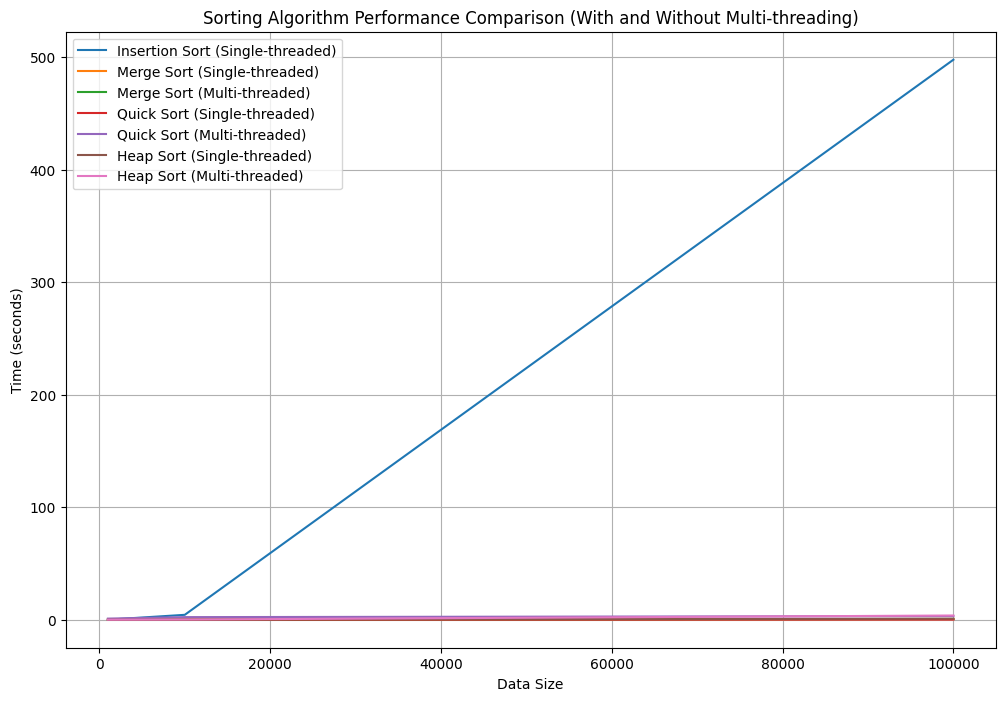

In [2]:
import concurrent.futures
import time
import random
import matplotlib.pyplot as plt

# Insertion Sort (Single-threaded)
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

# Merge Sort (Single-threaded)
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]
        merge_sort(L)
        merge_sort(R)
        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

# Merge Sort (Multi-threaded)
def merge_sort_multithreaded(arr, depth =0):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]
        if depth <5 :
          with concurrent.futures.ThreadPoolExecutor() as executor:
            future_left = executor.submit(merge_sort_multithreaded, L, depth+1)
            future_right = executor.submit(merge_sort_multithreaded, R, depth + 1)
            future_left.result()
            future_right.result()
        else:
          merge_sort(L)
          merge_sort(R)

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

# Quick Sort (Single-threaded)
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[len(arr) // 2]
        left = [x for x in arr if x < pivot]
        middle = [x for x in arr if x == pivot]
        right = [x for x in arr if x > pivot]
        return quick_sort(left) + middle + quick_sort(right)

# Quick Sort (Multi-threaded)
def quick_sort_multithreaded(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[len(arr) // 2]
        left = [x for x in arr if x < pivot]
        middle = [x for x in arr if x == pivot]
        right = [x for x in arr if x > pivot]

        with concurrent.futures.ThreadPoolExecutor() as executor:
            future_left = executor.submit(quick_sort_multithreaded, left)
            future_right = executor.submit(quick_sort_multithreaded, right)
            left_sorted = future_left.result()
            right_sorted = future_right.result()

        return left_sorted + middle + right_sorted

# Heap Sort (Single-threaded)
def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2
    if l < n and arr[l] > arr[largest]:
        largest = l
    if r < n and arr[r] > arr[largest]:
        largest = r
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

# Heap Sort (Multi-threaded)
def heap_sort_multithreaded(arr):
    n = len(arr)

    def heapify_parallel(arr, n, i):
        largest = i
        l = 2 * i + 1
        r = 2 * i + 2
        if l < n and arr[l] > arr[largest]:
            largest = l
        if r < n and arr[r] > arr[largest]:
            largest = r
        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            heapify_parallel(arr, n, largest)

    with concurrent.futures.ThreadPoolExecutor() as executor:
        for i in range(n // 2 - 1, -1, -1):
            executor.submit(heapify_parallel, arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

# Performance measurement function
def measure_performance(sort_func, data):
    start_time = time.time()
    sort_func(data.copy())  # Use a copy of the data to avoid sorting an already sorted array
    end_time = time.time()
    return end_time - start_time

# Generate random data for different sizes
data_sizes = [1000, 10000, 100000]
sorting_algorithms = {
    'Insertion Sort (Single-threaded)': insertion_sort,
    'Merge Sort (Single-threaded)': merge_sort,
    'Merge Sort (Multi-threaded)': merge_sort_multithreaded,
    'Quick Sort (Single-threaded)': quick_sort,
    'Quick Sort (Multi-threaded)': quick_sort_multithreaded,
    'Heap Sort (Single-threaded)': heap_sort,
    'Heap Sort (Multi-threaded)': heap_sort_multithreaded
}

# Store performance results for plotting
performance_results = {alg: [] for alg in sorting_algorithms.keys()}

# Measure sorting performance for each algorithm and data size
for size in data_sizes:
    data = [random.randint(0, 1000) for _ in range(size)]

    for alg_name, sort_func in sorting_algorithms.items():
        time_taken = measure_performance(sort_func, data)
        performance_results[alg_name].append(time_taken)
        print(f"{alg_name} for {size} elements: {time_taken:.6f} seconds")

# Visualization of performance
plt.figure(figsize=(12, 8))

# Plot performance comparison for each sorting algorithm
for alg_name, times in performance_results.items():
    plt.plot(data_sizes, times, label=alg_name)

plt.xlabel('Data Size')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithm Performance Comparison (With and Without Multi-threading)')
plt.legend()
plt.grid(True)
plt.show()
